<a href="https://colab.research.google.com/github/cvillarr123/trading/blob/master/notebook/balance_v001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/chrisconlan/algorithmic-trading-with-python.git


Cloning into 'algorithmic-trading-with-python'...
remote: Enumerating objects: 341, done.
remote: Counting objects: 100% (341/341), done.
remote: Compressing objects: 100% (314/314), done.
remote: Total 341 (delta 44), reused 312 (delta 24), pack-reused 0
Receiving objects: 100% (341/341), 4.83 MiB | 1.21 MiB/s, done.
Resolving deltas: 100% (44/44), done.


In [2]:
!pip install alpha_vantage

     |████████████████████████████████| 1.3MB 14.7MB/s 
     |████████████████████████████████| 143kB 54.0MB/s 
     |████████████████████████████████| 296kB 56.0MB/s 


In [3]:
!pip install alpha_vantage pandas

In [4]:
!pip install plotly==5.0.0

     |████████████████████████████████| 19.1MB 1.2MB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [5]:
!pip install chart-studio

     |████████████████████████████████| 71kB 2.7MB/s 


In [6]:
!pip install pandas_ta
#https://github.com/twopirllc/pandas-ta#stable


     |████████████████████████████████| 92kB 3.6MB/s 
  Created wheel for pandas-ta: filename=pandas_ta-0.2.45b0-cp37-none-any.whl size=175305 sha256=d9fe6a8c787d4ee7416716559fc9ba3456c49658201999baf757ee06de375963
  Stored in directory: /root/.cache/pip/wheels/78/76/74/e4b09c98fc91d7e1e0a56f4fe067796f216deacaa509234579
Successfully built pandas-ta


In [7]:
%cd algorithmic-trading-with-python/src/

/content/algorithmic-trading-with-python/src


In [8]:
!ls

bootstrap_portfolio.py	       pypm
fit_alternative_data_model.py  simulate_alternative_data_portfolio.py
__init__.py		       simulate_portfolio.py
optimize_portfolio.py	       white_noise_portfolio.py


In [9]:
import sys
sys.path.insert(0, '/content/algorithmic-trading-with-python/src/pypm')

In [10]:
import pypm
from pypm import metrics
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import os
# Make plots bigger
import datetime
import numpy as np
import plotly.graph_objs as go
import plotly as py



import plotly.express as px
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)

pd.set_option('max_colwidth', 400)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#metrics.calculate_calmar_ratio

In [11]:
#para dibujar solo velas
def drawCandleStick(data):
    candlestick = go.Candlestick(
        x = data.index,
        open = data['open'],
        high = data['high'], 
        low = data['low'],
        close = data['close']
    )
    # create a plot
    fig.update_xaxes(
        rangebreaks=[
            dict(bounds=["sat", "mon"]) #, #hide weekends
            #dict(values=["2021-06-16", "2021-06-06"])  # hide Christmas and New Year's
        ]
    )
    fig = go.Figure(data=[candlestick])
    fig.show()

In [12]:
fromD = 'GBP'
toD='AUD'
# **Ver el precio de intercambio al cierre**

from alpha_vantage.foreignexchange import ForeignExchange
from pprint import pprint
cc = ForeignExchange(key='1035HSNE5D7XWHLM',output_format='pandas')

# There is no metadata in this call
data_exchange_rate, meta_exchange_rate = cc.get_currency_exchange_rate(from_currency=fromD,to_currency=toD)

#data_exchange_rate.head(5)




In [13]:
# para analisis diario
columns = ['open','high','low','close']

data_daily, meta_daily = cc.get_currency_exchange_daily ( 'GBP','AUD',outputsize='compact')

data_daily.columns = columns
data_daily.sort_index(ascending=True,inplace=True)
data_daily["TradeDate"] = data_daily.index.date
data_daily.TradeDate = pd.to_datetime(data_daily.TradeDate, format='%Y-%m-%d')


#data_daily['DateIndex'] = pd.to_datetime(data_daily.TradeDate, format='%Y-%m-%d')

data_daily.reset_index(drop=True,inplace=True)
#data_daily.set_index('DateIndex',inplace=True)

data_daily.dtypes






open                float64
high                float64
low                 float64
close               float64
TradeDate    datetime64[ns]
dtype: object

In [14]:
data_daily.head()
#cuack=data_daily[ (data_daily.TradeDate  >= pd.to_datetime('2021-02-01', format='%Y-%m-%d')) & ( data_daily.TradeDate  < pd.to_datetime('2021-06-21', format='%Y-%m-%d')) ]
#cuack.head()

,open,high,low,close,TradeDate
0,1.78729,1.79046,1.78146,1.78311,2021-02-08
1,1.78325,1.78836,1.78106,1.78480,2021-02-09
2,1.78524,1.79265,1.78301,1.79094,2021-02-10
3,1.79117,1.79246,1.77873,1.78215,2021-02-11
4,1.78147,1.78913,1.77861,1.78295,2021-02-12


In [15]:
np.max(data_daily.TradeDate)

Timestamp('2021-06-25 00:00:00')

In [16]:
np.min(data_daily.TradeDate)

Timestamp('2021-02-08 00:00:00')

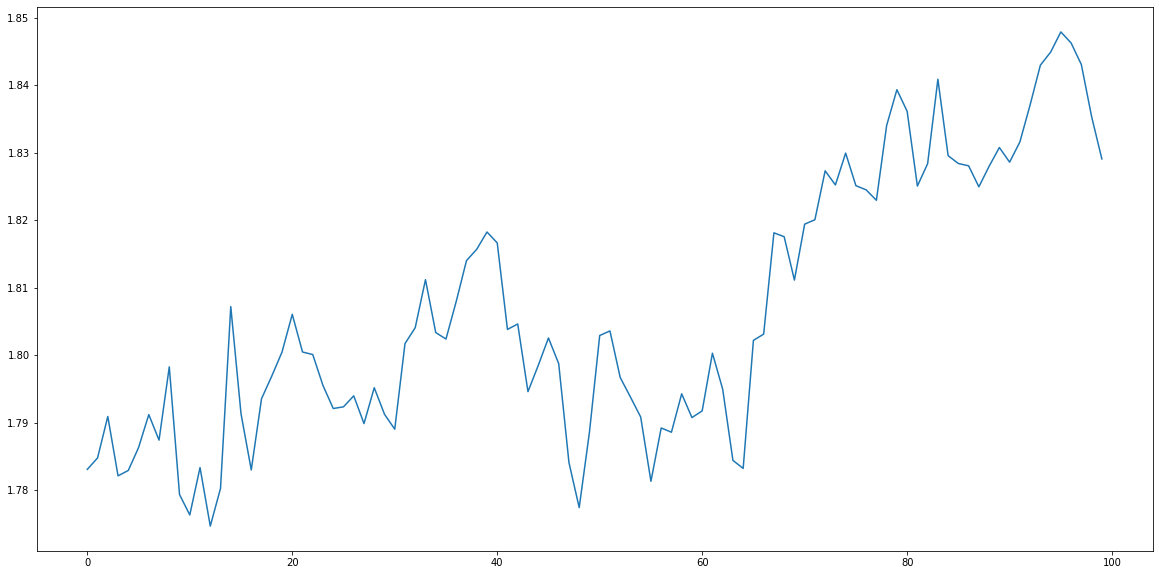

In [17]:
plt.plot(data_daily["close"])

In [18]:

# para analisis mensual

data_monthly, meta_monthly = cc.get_currency_exchange_monthly('GBP','AUD',outputsize='compact')


#data_monthly.head(5)



In [19]:

# Ver el intraday para el calculo de banderas

data_intraday, meta_intraday = cc.get_currency_exchange_intraday('GBP','AUD',interval='15min',outputsize='full')

data_intraday.columns = columns
data_intraday.sort_index(ascending=True,inplace=True)
data_intraday['TradeDate'] = data_intraday.index.date 


data_intraday['time'] = data_intraday.index.time
data_intraday["date"] = data_intraday.index.to_pydatetime()

format = '%Y-%m-%d %H:%M:%S'

data_intraday['date'] = pd.to_datetime(data_intraday.date, format=format)
data_intraday = data_intraday.set_index(pd.DatetimeIndex(data_intraday['date']))

data_daily.sort_index(ascending=True,inplace=True)

data_intraday.reset_index(drop=True,inplace=True)

#data_intraday.set_index('date',inplace=True)



data_intraday.head(10)

,open,high,low,close,TradeDate,time,date
0,1.83389,1.83449,1.83320,1.83358,2021-06-11,16:15:00,2021-06-11 16:15:00
1,1.83357,1.83369,1.83252,1.83300,2021-06-11,16:30:00,2021-06-11 16:30:00
2,1.83302,1.83344,1.83169,1.83231,2021-06-11,16:45:00,2021-06-11 16:45:00
3,1.83230,1.83303,1.83138,1.83178,2021-06-11,17:00:00,2021-06-11 17:00:00
4,1.83177,1.83193,1.83086,1.83157,2021-06-11,17:15:00,2021-06-11 17:15:00
5,1.83157,1.83203,1.83114,1.83200,2021-06-11,17:30:00,2021-06-11 17:30:00
6,1.83194,1.83226,1.83140,1.83191,2021-06-11,17:45:00,2021-06-11 17:45:00
7,1.83185,1.83235,1.83139,1.83230,2021-06-11,18:00:00,2021-06-11 18:00:00
8,1.83229,1.83254,1.83176,1.83227,2021-06-11,18:15:00,2021-06-11 18:15:00
9,1.83227,1.83232,1.83123,1.83173,2021-06-11,18:30:00,2021-06-11 18:30:00


In [20]:
titulo='Prices:' + fromD + '-' + toD

In [21]:
data_intraday.dtypes

open                float64
high                float64
low                 float64
close               float64
TradeDate            object
time                 object
date         datetime64[ns]
dtype: object

In [22]:
data_intraday.head(10)

,open,high,low,close,TradeDate,time,date
0,1.83389,1.83449,1.83320,1.83358,2021-06-11,16:15:00,2021-06-11 16:15:00
1,1.83357,1.83369,1.83252,1.83300,2021-06-11,16:30:00,2021-06-11 16:30:00
2,1.83302,1.83344,1.83169,1.83231,2021-06-11,16:45:00,2021-06-11 16:45:00
3,1.83230,1.83303,1.83138,1.83178,2021-06-11,17:00:00,2021-06-11 17:00:00
4,1.83177,1.83193,1.83086,1.83157,2021-06-11,17:15:00,2021-06-11 17:15:00
5,1.83157,1.83203,1.83114,1.83200,2021-06-11,17:30:00,2021-06-11 17:30:00
6,1.83194,1.83226,1.83140,1.83191,2021-06-11,17:45:00,2021-06-11 17:45:00
7,1.83185,1.83235,1.83139,1.83230,2021-06-11,18:00:00,2021-06-11 18:00:00
8,1.83229,1.83254,1.83176,1.83227,2021-06-11,18:15:00,2021-06-11 18:15:00
9,1.83227,1.83232,1.83123,1.83173,2021-06-11,18:30:00,2021-06-11 18:30:00


In [23]:
#omitir las fechas de fin de semana
data_intraday = data_intraday[data_intraday.date.dt.dayofweek < 5 ]

In [24]:
data_descartar = data_intraday[data_intraday.date.dt.dayofweek >= 5 ]['close'] + 1
data_descartar

Series([], Name: close, dtype: float64)

In [25]:
data_descartar.head(1)

Series([], Name: close, dtype: float64)

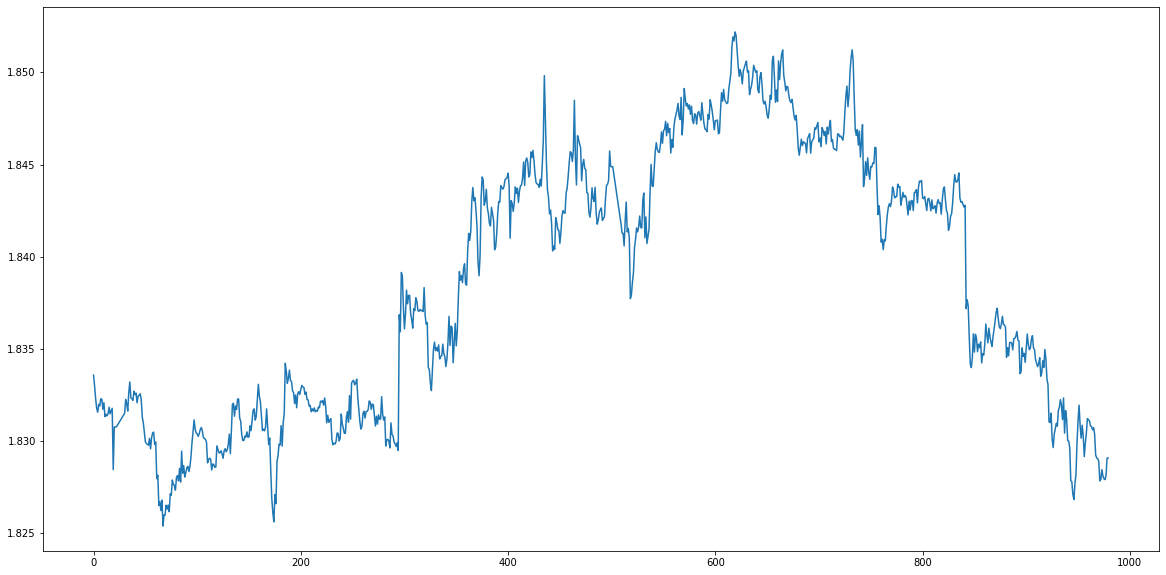

In [26]:
plt.plot(data_intraday["close"])

In [27]:
data_intraday.groupby('TradeDate').agg({'low':min, 'high':max})

,low,high
TradeDate,,
2021-06-11,1.82837,1.83449
2021-06-14,1.82473,1.83366
2021-06-15,1.82473,1.83486
2021-06-16,1.82897,1.84018
2021-06-17,1.82960,1.84488
2021-06-18,1.83955,1.85022
2021-06-21,1.83655,1.84955
2021-06-22,1.84411,1.85237
2021-06-23,1.83979,1.85201


In [28]:
pd_fechas_total = pd.date_range(start=data_intraday.TradeDate.min() , end= data_intraday.TradeDate.max())
type(pd_fechas_total)

pandas.core.indexes.datetimes.DatetimeIndex

In [29]:
pd_fechas_total.to_list()

[Timestamp('2021-06-11 00:00:00', freq='D'),
 Timestamp('2021-06-12 00:00:00', freq='D'),
 Timestamp('2021-06-13 00:00:00', freq='D'),
 Timestamp('2021-06-14 00:00:00', freq='D'),
 Timestamp('2021-06-15 00:00:00', freq='D'),
 Timestamp('2021-06-16 00:00:00', freq='D'),
 Timestamp('2021-06-17 00:00:00', freq='D'),
 Timestamp('2021-06-18 00:00:00', freq='D'),
 Timestamp('2021-06-19 00:00:00', freq='D'),
 Timestamp('2021-06-20 00:00:00', freq='D'),
 Timestamp('2021-06-21 00:00:00', freq='D'),
 Timestamp('2021-06-22 00:00:00', freq='D'),
 Timestamp('2021-06-23 00:00:00', freq='D'),
 Timestamp('2021-06-24 00:00:00', freq='D'),
 Timestamp('2021-06-25 00:00:00', freq='D')]

In [30]:
data_intraday.TradeDate.unique()


array([datetime.date(2021, 6, 11), datetime.date(2021, 6, 14),
       datetime.date(2021, 6, 15), datetime.date(2021, 6, 16),
       datetime.date(2021, 6, 17), datetime.date(2021, 6, 18),
       datetime.date(2021, 6, 21), datetime.date(2021, 6, 22),
       datetime.date(2021, 6, 23), datetime.date(2021, 6, 24),
       datetime.date(2021, 6, 25)], dtype=object)

In [31]:

dt_breaks = [d for d in pd_fechas_total.to_list() if not d in data_intraday.TradeDate.unique()]

In [32]:
dt_breaks

[Timestamp('2021-06-12 00:00:00', freq='D'),
 Timestamp('2021-06-13 00:00:00', freq='D'),
 Timestamp('2021-06-19 00:00:00', freq='D'),
 Timestamp('2021-06-20 00:00:00', freq='D')]

In [33]:
data_intraday.dtypes
data_intraday.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            970, 971, 972, 973, 974, 975, 976, 977, 978, 979],
           dtype='int64', length=966)

In [34]:
data_intraday.groupby('TradeDate').agg({'low':min, 'high':max})

,low,high
TradeDate,,
2021-06-11,1.82837,1.83449
2021-06-14,1.82473,1.83366
2021-06-15,1.82473,1.83486
2021-06-16,1.82897,1.84018
2021-06-17,1.82960,1.84488
2021-06-18,1.83955,1.85022
2021-06-21,1.83655,1.84955
2021-06-22,1.84411,1.85237
2021-06-23,1.83979,1.85201


In [35]:
# busca en que registro (fecha completa hora min seg) se dio el precio minimo para ese dia,
# se lo puede verificar con el dato proporcionado antes
data_intraday.loc[data_intraday.groupby('TradeDate')['low'].idxmin()]

,open,high,low,close,TradeDate,time,date
19,1.83175,1.83264,1.82837,1.82845,2021-06-11,21:00:00,2021-06-11 21:00:00
67,1.82680,1.82710,1.82473,1.82539,2021-06-14,09:15:00,2021-06-14 09:15:00
174,1.82604,1.82621,1.82473,1.82562,2021-06-15,12:00:00,2021-06-15 12:00:00
286,1.83003,1.83015,1.82897,1.82963,2021-06-16,16:00:00,2021-06-16 16:00:00
325,1.83389,1.83396,1.82960,1.83316,2021-06-17,01:45:00,2021-06-17 01:45:00
445,1.84055,1.84089,1.83955,1.84041,2021-06-18,07:45:00,2021-06-18 07:45:00
519,1.83774,1.83822,1.83655,1.83793,2021-06-21,02:30:00,2021-06-21 02:30:00
692,1.84594,1.84743,1.84411,1.84562,2021-06-22,21:45:00,2021-06-22 21:45:00
763,1.84041,1.84122,1.83979,1.84093,2021-06-23,15:30:00,2021-06-23 15:30:00
846,1.83566,1.83578,1.83301,1.83419,2021-06-24,12:15:00,2021-06-24 12:15:00


In [36]:
# busca en que registro (fecha completa hora min seg) se dio el precio maximo para ese dia,
# se lo puede verificar con el dato proporcionado antes
data_intraday.loc[data_intraday.groupby('TradeDate')['high'].idxmax()]

,open,high,low,close,TradeDate,time,date
0,1.83389,1.83449,1.83320,1.83358,2021-06-11,16:15:00,2021-06-11 16:15:00
35,1.83270,1.83366,1.83229,1.83321,2021-06-14,01:15:00,2021-06-14 01:15:00
186,1.83429,1.83486,1.83193,1.83379,2021-06-15,15:00:00,2021-06-15 15:00:00
298,1.83903,1.84018,1.83699,1.83896,2021-06-16,19:00:00,2021-06-16 19:00:00
376,1.84434,1.84488,1.84284,1.84416,2021-06-17,14:30:00,2021-06-17 14:30:00
436,1.84986,1.85022,1.84725,1.84742,2021-06-18,05:30:00,2021-06-18 05:30:00
572,1.84855,1.84955,1.84745,1.84818,2021-06-21,15:45:00,2021-06-21 15:45:00
617,1.85132,1.85237,1.85095,1.85193,2021-06-22,03:00:00,2021-06-22 03:00:00
733,1.85123,1.85201,1.85059,1.85064,2021-06-23,08:00:00,2021-06-23 08:00:00
835,1.84415,1.84552,1.84405,1.84455,2021-06-24,09:30:00,2021-06-24 09:30:00


In [37]:
import pandas_ta as ta


In [38]:
# Calculate Returns and append to the df DataFrame
data_intraday.ta.log_return(cumulative=False, append=True,percent=True)
data_intraday.ta.percent_return(cumulative=False, append=True,percent=True)

# New Columns with results
data_intraday.columns

# Take a peek
data_intraday.head()



,open,high,low,close,TradeDate,time,date,LOGRET_1,PCTRET_1
0,1.83389,1.83449,1.83320,1.83358,2021-06-11,16:15:00,2021-06-11 16:15:00,NaN,NaN
1,1.83357,1.83369,1.83252,1.83300,2021-06-11,16:30:00,2021-06-11 16:30:00,-0.000316,-0.000316
2,1.83302,1.83344,1.83169,1.83231,2021-06-11,16:45:00,2021-06-11 16:45:00,-0.000377,-0.000376
3,1.83230,1.83303,1.83138,1.83178,2021-06-11,17:00:00,2021-06-11 17:00:00,-0.000289,-0.000289
4,1.83177,1.83193,1.83086,1.83157,2021-06-11,17:15:00,2021-06-11 17:15:00,-0.000115,-0.000115


In [39]:
data_intraday["close_return"] = metrics.calculate_return_series(data_intraday.close)*100
data_intraday["close_log_return"] = metrics.calculate_log_return_series(data_intraday.close)*100

In [40]:
data_intraday.head()

,open,high,low,close,TradeDate,time,date,LOGRET_1,PCTRET_1,close_return,close_log_return
0,1.83389,1.83449,1.83320,1.83358,2021-06-11,16:15:00,2021-06-11 16:15:00,NaN,NaN,NaN,NaN
1,1.83357,1.83369,1.83252,1.83300,2021-06-11,16:30:00,2021-06-11 16:30:00,-0.000316,-0.000316,-0.031632,-0.031637
2,1.83302,1.83344,1.83169,1.83231,2021-06-11,16:45:00,2021-06-11 16:45:00,-0.000377,-0.000376,-0.037643,-0.037650
3,1.83230,1.83303,1.83138,1.83178,2021-06-11,17:00:00,2021-06-11 17:00:00,-0.000289,-0.000289,-0.028925,-0.028929
4,1.83177,1.83193,1.83086,1.83157,2021-06-11,17:15:00,2021-06-11 17:15:00,-0.000115,-0.000115,-0.011464,-0.011465


In [41]:
data_intraday['intra_return'] = data_intraday.close.pct_change()*100

In [42]:
data_intraday.head()

,open,high,low,close,TradeDate,time,date,LOGRET_1,PCTRET_1,close_return,close_log_return,intra_return
0,1.83389,1.83449,1.83320,1.83358,2021-06-11,16:15:00,2021-06-11 16:15:00,NaN,NaN,NaN,NaN,NaN
1,1.83357,1.83369,1.83252,1.83300,2021-06-11,16:30:00,2021-06-11 16:30:00,-0.000316,-0.000316,-0.031632,-0.031637,-0.031632
2,1.83302,1.83344,1.83169,1.83231,2021-06-11,16:45:00,2021-06-11 16:45:00,-0.000377,-0.000376,-0.037643,-0.037650,-0.037643
3,1.83230,1.83303,1.83138,1.83178,2021-06-11,17:00:00,2021-06-11 17:00:00,-0.000289,-0.000289,-0.028925,-0.028929,-0.028925
4,1.83177,1.83193,1.83086,1.83157,2021-06-11,17:15:00,2021-06-11 17:15:00,-0.000115,-0.000115,-0.011464,-0.011465,-0.011464


In [43]:


df_trunc = data_intraday.copy()

fig = px.line(df_trunc, x='date', y='intra_return', range_x=['2021-06-11', '2021-06-26'], title='Retorno Porcentual precios:'+fromD + '-' + toD)

fig.update_xaxes(
    rangebreaks=[
        dict(bounds=["sat", "mon"]) #, #hide weekends
        #dict(values=["2021-06-16", "2021-06-06"])  # hide Christmas and New Year's
    ]
)
fig.show()

Ver la variabilidad a traves de un histograma del retorno porcentual del precio de cierre

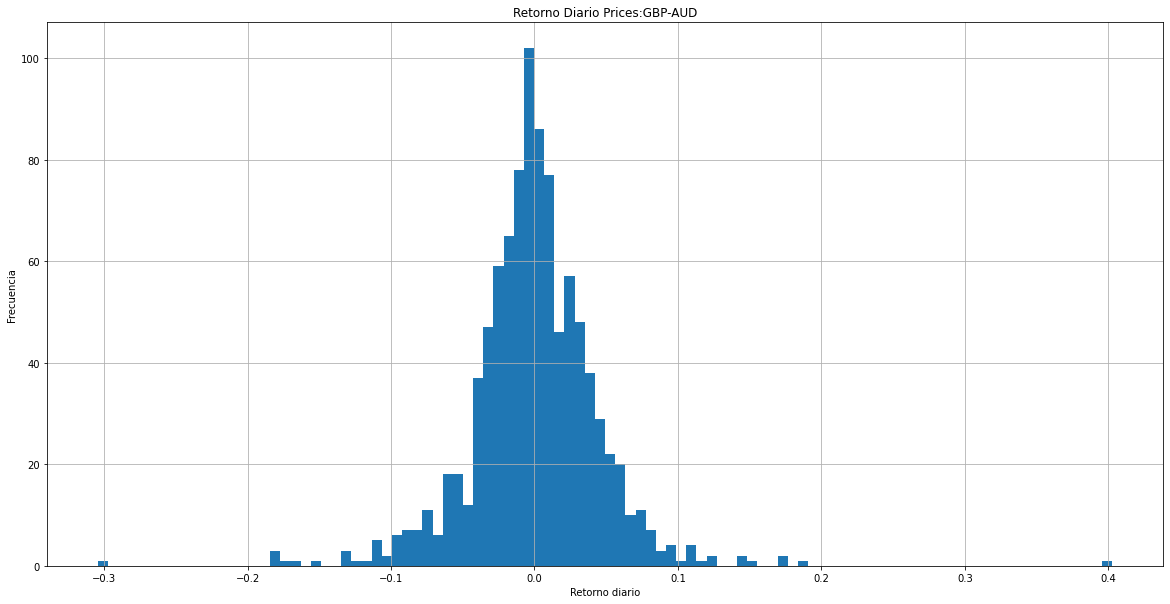

In [49]:
data_intraday['intra_return'].hist(bins=100)
plt.ylabel('Frecuencia')
plt.xlabel('Retorno diario')
plt.title('Retorno Diario '+titulo)
plt.show()

In [47]:
# si quisiera hacer un resample de intraday a dia
resample_diary = data_intraday.set_index('date').resample('D').mean()
resample_diary.head(5)
resample_weekly = data_intraday.set_index('date').resample('W').mean()
resample_weekly.head(5)


,open,high,low,close,LOGRET_1,PCTRET_1,close_return,close_log_return,intra_return
date,,,,,,,,,
2021-06-13,1.831865,1.832183,1.831133,1.831637,-0.000070,-0.000070,-0.006958,-0.006971,-0.006958
2021-06-20,1.835205,1.835858,1.834329,1.835222,0.000016,0.000016,0.001639,0.001628,0.001639
2021-06-27,1.842177,1.842785,1.841259,1.842137,-0.000018,-0.000018,-0.001818,-0.001827,-0.001818


In [ ]:
data_intraday['MVS50']=data_intraday['close'].rolling(window=50).mean()

In [ ]:
#MVS30 = pd.DataFrame()
#MVS30['close']=market['close'].rolling(window=30).mean()
data_intraday['MVS30']=data_intraday['close'].rolling(window=30).mean()

In [ ]:
#MVS30[MVS30.close.notna()].head()

In [ ]:
#MVS100 = pd.DataFrame()
#MVS100['close']=market['close'].rolling(window=100).mean()
data_intraday['MVS100']=data_intraday['close'].rolling(window=100).mean()

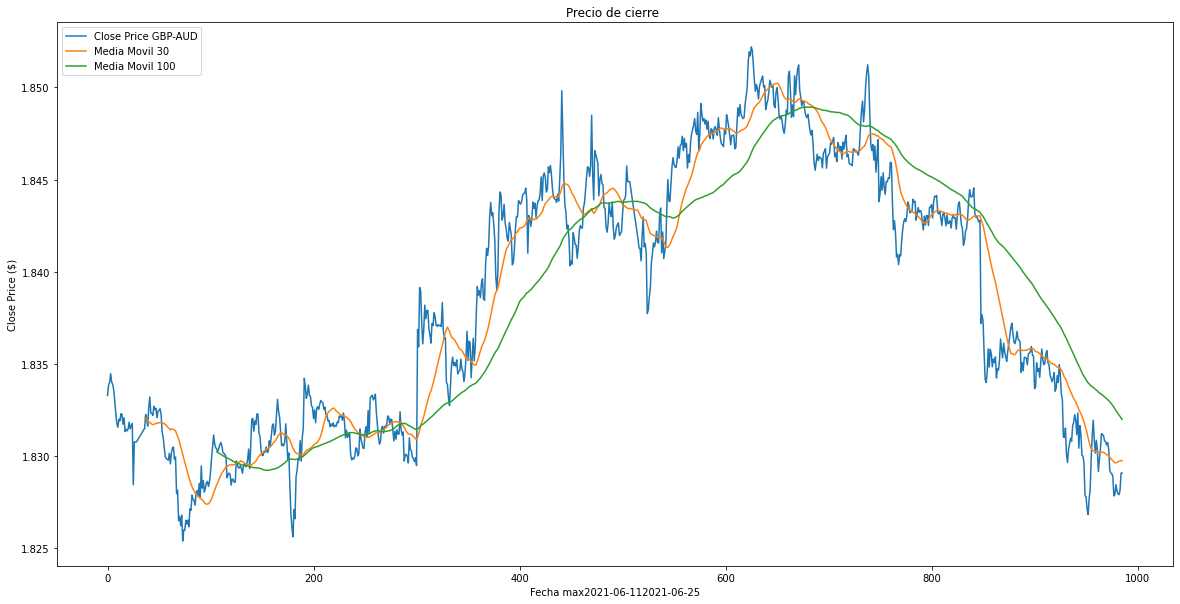

In [ ]:
plt.figure()
plt.plot(data_intraday['close'], label = 'Close Price GBP-AUD')
plt.plot(data_intraday['MVS30'], label = 'Media Movil 30')
plt.plot(data_intraday['MVS100'], label = 'Media Movil 100')
plt.title('Precio de cierre '  )
plt.xlabel( 'Fecha max' +  str( np.min(data_intraday.TradeDate) ) + str(np.max(data_intraday.TradeDate)  ))
plt.ylabel('Close Price ($)')
plt.legend(loc='upper left')
plt.show()


In [ ]:
analisis_diario = data_daily.copy()

In [ ]:
analisis_diario['MVS30']=analisis_diario['close'].rolling(window=30).mean()

In [ ]:
analisis_diario['MVS60']=analisis_diario['close'].rolling(window=60).mean()

In [ ]:
analisis_diario.head(10)

,open,high,low,close,TradeDate,MVS30,MVS60
0,1.78729,1.79046,1.78146,1.78311,2021-02-08,NaN,NaN
1,1.78325,1.78836,1.78106,1.78480,2021-02-09,NaN,NaN
2,1.78524,1.79265,1.78301,1.79094,2021-02-10,NaN,NaN
3,1.79117,1.79246,1.77873,1.78215,2021-02-11,NaN,NaN
4,1.78147,1.78913,1.77861,1.78295,2021-02-12,NaN,NaN
5,1.78328,1.78943,1.78189,1.78633,2021-02-15,NaN,NaN
6,1.78608,1.79432,1.78523,1.79122,2021-02-16,NaN,NaN
7,1.79141,1.79666,1.78582,1.78744,2021-02-17,NaN,NaN
8,1.78628,1.80236,1.78473,1.79829,2021-02-18,NaN,NaN
9,1.79839,1.79941,1.77803,1.77938,2021-02-19,NaN,NaN


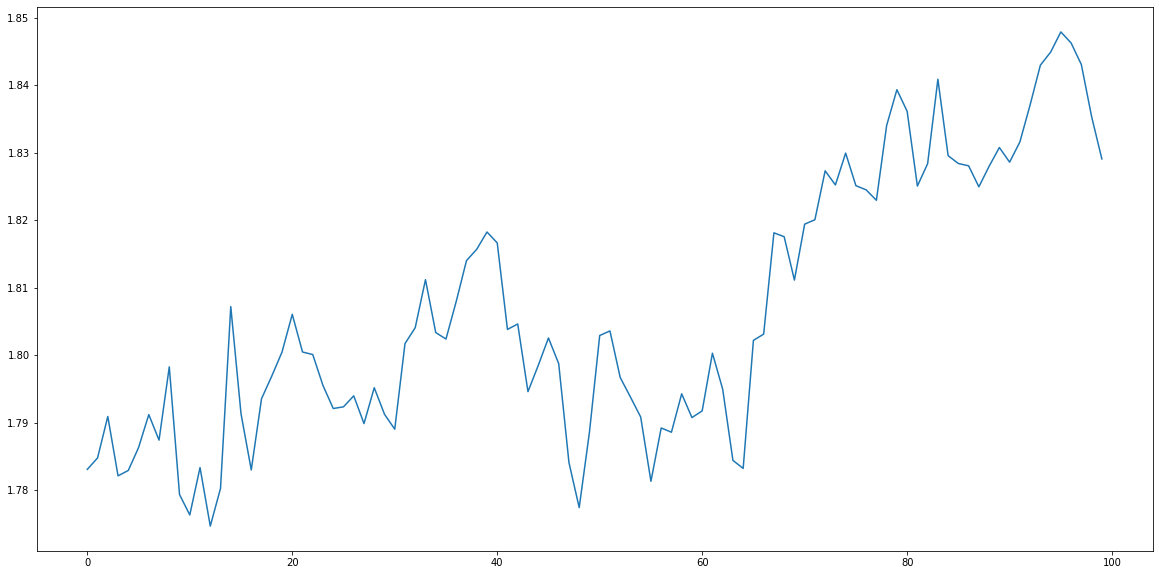

In [ ]:


plt.plot(analisis_diario['close'], label = 'Close Price GBP-AUD')

#market = data_intraday.between_time('09:30:00','16:00:00').copy()
#market.sort_index(inplace=True)

#market.plot(market.close)
#plt.plot(analisis_diario["close"])

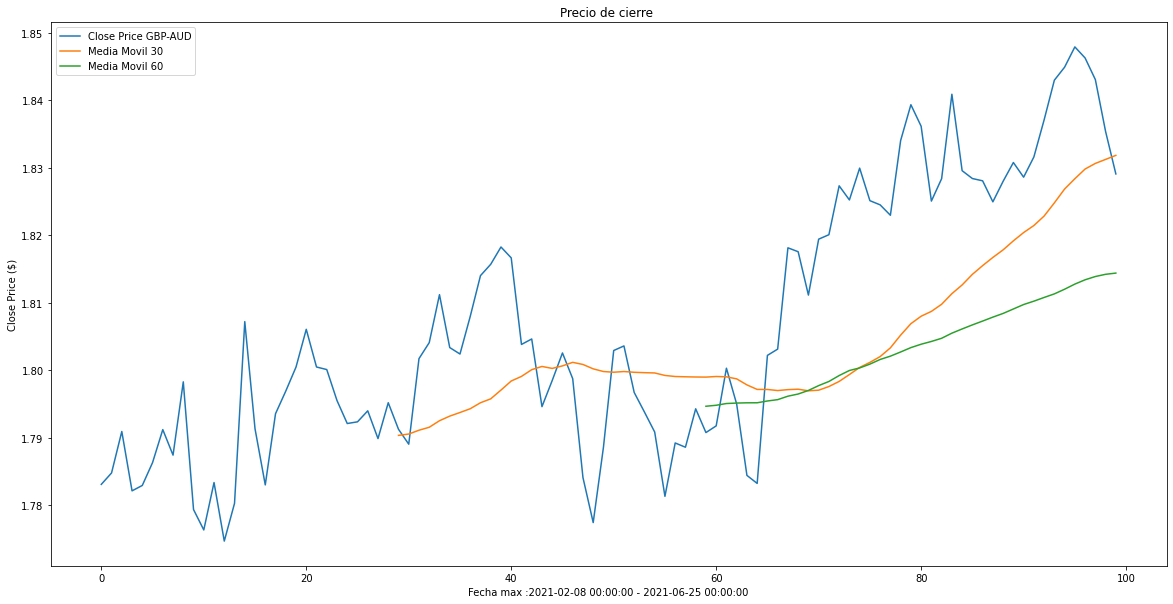

In [ ]:
plt.figure()
plt.plot(analisis_diario['close'], label = 'Close Price GBP-AUD')
plt.plot(analisis_diario['MVS30'], label = 'Media Movil 30')
plt.plot(analisis_diario['MVS60'], label = 'Media Movil 60')
plt.title('Precio de cierre '  )
plt.xlabel( 'Fecha max :' +  str( np.min(analisis_diario.TradeDate) ) + ' - '+ str(np.max(analisis_diario.TradeDate)  ))
plt.ylabel('Close Price ($)')
plt.legend(loc='upper left')
plt.show()


In [ ]:
str(np.min(data_daily.TradeDate) )

'2021-02-08 00:00:00'

In [ ]:
str(np.max(data_daily.TradeDate) )


'2021-06-25 00:00:00'

In [ ]:
def senal(data, columna_analisis1, columna_analisis2):
    compra = []
    venta = []
    condicion = 0
    
    for dia in range(len(data)):
        
        if data[columna_analisis1][dia] > data[columna_analisis2][dia]:
            if condicion != 1:
                compra.append(data['close'][dia])
                venta.append(np.nan)
                condicion = 1
            else:
                compra.append(np.nan)
                venta.append(np.nan)
            
        elif data[columna_analisis1][dia] < data[columna_analisis2][dia]:
            if condicion != -1:
                venta.append(data['close'][dia])
                compra.append(np.nan)
                condicion = -1
            else:
                compra.append(np.nan)
                venta.append(np.nan)
        else:
            compra.append(np.nan)
            venta.append(np.nan)
            
    return (compra, venta)

In [ ]:
senales = senal(data_intraday.set_index('date'),'MVS30','MVS100')
data_intraday['PosibleCompra'] = senales[0]
data_intraday['PosibleVenta'] = senales[1]
data_intraday[data_intraday.MVS100.notna()].head(10)

,open,high,low,close,TradeDate,time,date,LOGRET_1,PCTRET_1,close_return,close_log_return,MVS30,MVS100,PosibleCompra,PosibleVenta
106,1.83044,1.83068,1.82973,1.83039,2021-06-14,17:30:00,2021-06-14 17:30:00,-0.000033,-0.000033,-0.000033,-0.000033,1.828436,1.830231,NaN,1.83039
107,1.83043,1.83052,1.82983,1.83026,2021-06-14,17:45:00,2021-06-14 17:45:00,-0.000071,-0.000071,-0.000071,-0.000071,1.828567,1.830201,NaN,NaN
108,1.83030,1.83055,1.82988,1.83041,2021-06-14,18:00:00,2021-06-14 18:00:00,0.000082,0.000082,0.000082,0.000082,1.828697,1.830166,NaN,NaN
109,1.83034,1.83086,1.83006,1.83063,2021-06-14,18:15:00,2021-06-14 18:15:00,0.000120,0.000120,0.000120,0.000120,1.828845,1.830133,NaN,NaN
110,1.83064,1.83084,1.83013,1.83074,2021-06-14,18:30:00,2021-06-14 18:30:00,0.000060,0.000060,0.000060,0.000060,1.828965,1.830095,NaN,NaN
111,1.83069,1.83105,1.83020,1.83055,2021-06-14,18:45:00,2021-06-14 18:45:00,-0.000104,-0.000104,-0.000104,-0.000104,1.829082,1.830061,NaN,NaN
112,1.83054,1.83071,1.82972,1.83019,2021-06-14,19:00:00,2021-06-14 19:00:00,-0.000197,-0.000197,-0.000197,-0.000197,1.829158,1.830024,NaN,NaN
113,1.83011,1.83034,1.82952,1.83015,2021-06-14,19:15:00,2021-06-14 19:15:00,-0.000022,-0.000022,-0.000022,-0.000022,1.829241,1.829989,NaN,NaN
114,1.83016,1.83028,1.82965,1.83009,2021-06-14,19:30:00,2021-06-14 19:30:00,-0.000033,-0.000033,-0.000033,-0.000033,1.829324,1.829960,NaN,NaN
115,1.82994,1.83021,1.82945,1.82994,2021-06-14,19:45:00,2021-06-14 19:45:00,-0.000082,-0.000082,-0.000082,-0.000082,1.829411,1.829937,NaN,NaN


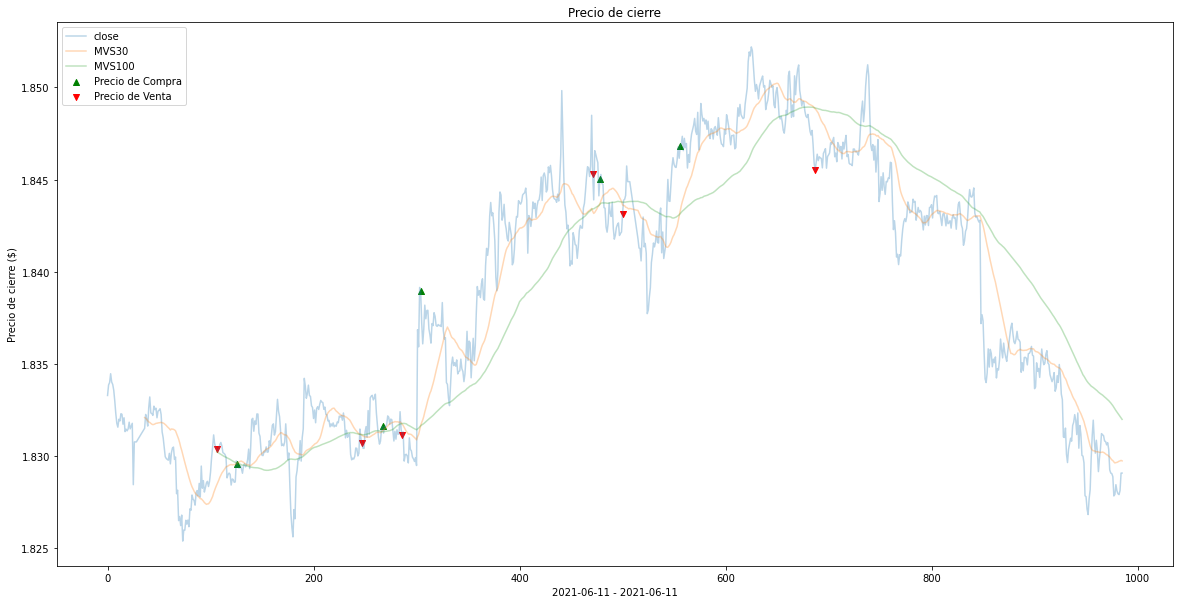

In [ ]:
plt.figure()
plt.plot(data_intraday['close'], label = 'close', alpha = 0.3)
plt.plot(data_intraday['MVS30'], label = 'MVS30', alpha = 0.3)
plt.plot(data_intraday['MVS100'], label = 'MVS100', alpha = 0.3)
plt.scatter(data_intraday.index, data_intraday['PosibleCompra'], label = 'Precio de Compra', marker = '^', color = 'green')
plt.scatter(data_intraday.index, data_intraday['PosibleVenta'], label = 'Precio de Venta', marker = 'v', color = 'red')
plt.title('Precio de cierre')
plt.xlabel( str(np.min(data_intraday.TradeDate) ) + ' - ' +  str(np.min(data_intraday.TradeDate) ))
plt.ylabel('Precio de cierre ($)')
plt.legend(loc = 'upper left')
plt.show()

In [ ]:
import chart_studio as ch

In [ ]:
data_intraday["TimeDate"] = data_intraday.index
data_intraday.head(2)


,open,high,low,close,TradeDate,time,date,LOGRET_1,PCTRET_1,close_return,close_log_return,MVS30,MVS100,PosibleCompra,PosibleVenta,TimeDate
0,1.83241,1.83369,1.83198,1.83329,2021-06-11,14:45:00,2021-06-11 14:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1.83336,1.83500,1.83289,1.83386,2021-06-11,15:00:00,2021-06-11 15:00:00,0.000311,0.000311,0.000311,0.000311,NaN,NaN,NaN,NaN,1


In [ ]:


df_long=pd.melt(data_intraday, id_vars=['TimeDate','date'], value_vars=['MVS30', 'MVS100'])


df_long.head(3)

,TimeDate,date,variable,value
0,0,2021-06-11 14:45:00,MVS30,NaN
1,1,2021-06-11 15:00:00,MVS30,NaN
2,2,2021-06-11 15:15:00,MVS30,NaN


In [ ]:
# plotly 
df_long.rename(columns={'value': 'Prices'})
etiqueta_titulo='Prices:' + fromD + '/' +  toD
fig = px.line(df_long, x='date', y='value', color='variable', title= etiqueta_titulo )

# Show plot 
fig.show()

In [ ]:
df=data_intraday.copy()
#df.set_index('date',inplace=True)
print('done')
titulo='Prices:' + fromD + '-' + toD




done


In [ ]:
df.head(2)

,open,high,low,close,TradeDate,time,date,LOGRET_1,PCTRET_1,close_return,close_log_return,MVS30,MVS100,PosibleCompra,PosibleVenta,TimeDate
0,1.8235,1.82412,1.82286,1.82396,2021-06-11,08:00:00,2021-06-11 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1.8240,1.82462,1.82316,1.82369,2021-06-11,08:15:00,2021-06-11 08:15:00,-0.000148,-0.000148,-0.000148,-0.000148,NaN,NaN,NaN,NaN,1


PARA IMPRIMIR VELAS SIN EL RANGO DE FECHAS DE FIN DE SEMANA

In [ ]:


df_trunc = df.copy()



fig = px.line(df_trunc, x='date', y='close', range_x=['2021-06-11', '2021-06-25'], title=titulo)



fig.update_xaxes(
    rangebreaks=[
        dict(bounds=["sat", "mon"]) #, #hide weekends
        #dict(values=["2021-06-16", "2021-06-06"])  # hide Christmas and New Year's
    ]
)
fig.show()
#fig = go.Figure(data=data)


In [ ]:

layout = go.Layout(
    xaxis=dict(rangebreaks=[
        dict(bounds=["sat", "mon"])#, # hide weekends
        #dict(values=["2015-12-25", "2016-01-01"]) # hide Christmas and New Year's
        ],
    )
)

trace = go.Candlestick(x=df_trunc.date, open=df_trunc.open, high=df_trunc.high, low=df_trunc.low, close=df_trunc.close,
                       name=titulo)

data = [trace]

fig = go.Figure(data=data,layout=layout)

fig.add_trace(go.Scatter(x=df_trunc.date, y=df_trunc.MVS30, mode='lines',  name='MVS30',line=dict(color='black')))
fig.add_trace(go.Scatter(x=df_trunc.date, y=df_trunc.MVS100, mode='lines',  name='MVS100',line=dict(color='blue')))

fig.update_xaxes(
    rangebreaks=[
        dict(bounds=["sat", "mon"]) #, #hide weekends
        #dict(values=["2021-06-16", "2021-06-06"])  # hide Christmas and New Year's
    ]
)

fig.show()
#py.offline.plot(fig, filename='USDCAD.html')